# Feature scaling
Feature scaling and standardization are two different techniques used for data preprocessing in machine learning and data analysis tasks. These techniques are applied to the input features (independent variables) of a dataset to ensure that they are on a similar scale, which can improve the performance and convergence of certain algorithms.

Feature Scaling:
Feature scaling is the process of rescaling the features to a common range, usually between 0 and 1 or -1 and 1. This is particularly important when features have different scales or units, as some machine learning algorithms (like gradient descent) can be sensitive to the scale of the input features.

One common method of feature scaling is min-max normalization (or rescaling), which rescales the features to a fixed range using the following formula:
# X_scaled = (X - X_min) / (X_max - X_min)

This scales the feature values to the range [0, 1].

Standardization:
Standardization, also known as z-score normalization, is another technique used to transform features to have a mean of 0 and a standard deviation of 1. This is particularly useful when features have different scales or units, and when the dataset contains outliers, as standardization is less affected by outliers compared to min-max scaling.

The formula for standardization is:
# X_standardized = (X - μ) / σ

Where μ is the mean of the feature, and σ is the standard deviation of the feature.
Both feature scaling and standardization can be important preprocessing steps for many machine learning algorithms, as they can help to ensure that all features are treated equally and that the optimization process is not biased towards features with larger scales. However, it's important to note that not all algorithms require these preprocessing steps, and in some cases, it may be better to leave the features in their original scale.
In practice, you can use libraries like scikit-learn in Python to perform feature scaling and standardization easily on your dataset before training your machine learning models.


In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv(r"C:\Users\Mega Computers\Downloads\archive (1)\loan.csv")
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
dataset["ApplicantIncome"].fillna(dataset["ApplicantIncome"].mean() ,inplace=True)

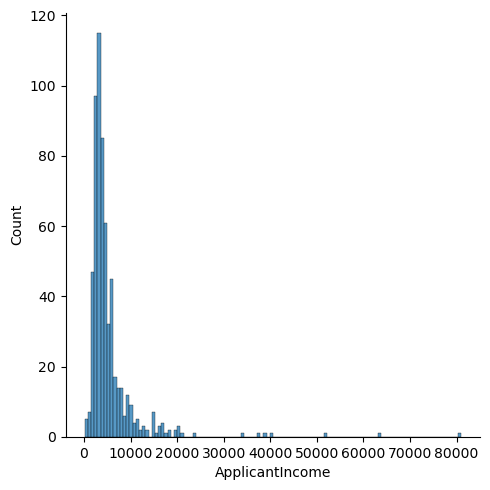

In [12]:
sns.distplot(dataset["ApplicantIncome"])
plt.show()

In [13]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
from sklearn.preprocessing import StandardScaler


In [19]:
ss = StandardScaler()
ss.fit(dataset[["ApplicantIncome"]])

StandardScaler()

In [22]:
dataset["ApplicantIncome_ss"]= pd.DataFrame(ss.transform(dataset[["ApplicantIncome"]]) , columns=["x"])

In [23]:
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728


In [26]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


C:\Users\Mega Computers\AppData\Local\Temp\ipykernel_27520\2944244941.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome_ss"])
C:\Users\Mega Computers\AppData\Local\Temp\ipykernel_27520\2944244941.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantInc

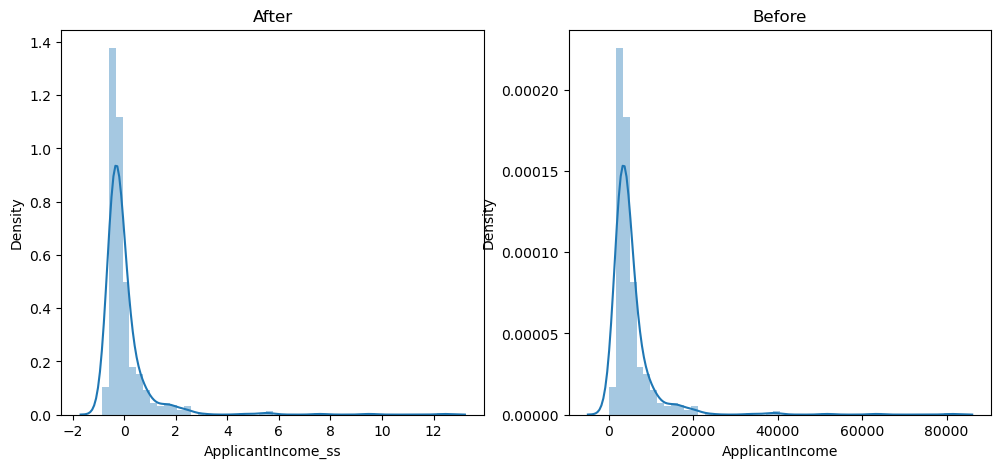

In [32]:
plt.figure(figsize=(12 ,5))
plt.subplot(1,2,1)
plt.title("After")
sns.distplot(dataset["ApplicantIncome_ss"])

plt.subplot(1,2,2)
plt.title("Before")
sns.distplot(dataset["ApplicantIncome"])
plt.show()

# Feature scaling Normalization min Max Scale

In [33]:
dataset = pd.read_csv(r"C:\Users\Mega Computers\Downloads\archive (1)\loan.csv")
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


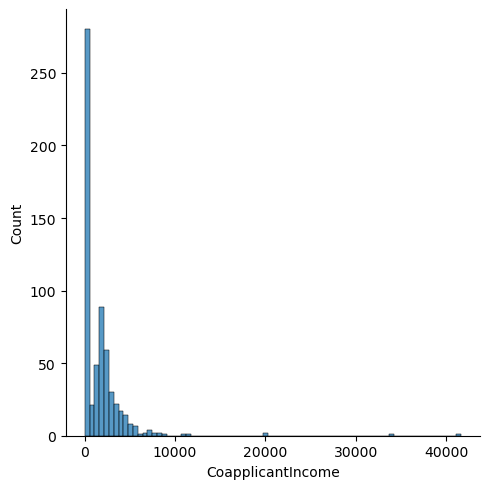

In [37]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
ms = MinMaxScaler()
ms.fit(dataset[["CoapplicantIncome"]])

MinMaxScaler()

In [42]:
ms.transform(dataset[["CoapplicantIncome"]])

array([[0.00000000e+00],
       [3.61917105e-02],
       [0.00000000e+00],
       [5.65915473e-02],
       [0.00000000e+00],
       [1.00703194e-01],
       [3.63837089e-02],
       [6.00955192e-02],
       [3.66237070e-02],
       [2.63229894e-01],
       [1.67998656e-02],
       [4.41596467e-02],
       [1.94542444e-01],
       [6.81594547e-02],
       [2.60637915e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [8.39993280e-02],
       [0.00000000e+00],
       [1.34998920e-01],
       [4.58636331e-02],
       [4.60076319e-02],
       [7.01994384e-02],
       [0.00000000e+00],
       [5.40715674e-02],
       [2.49598003e-02],
       [0.00000000e+00],
       [4.99916001e-02],
       [8.08553532e-02],
       [0.00000000e+00],
       [0.00000000e+00],
       [4.00076799e-02],
       [7.19994240e-02],
       [4.96076031e-02],
       [3.19197446e-02],
       [3.50157199e-02],
       [1.73038616e-01],
       [4.00316797e-02],


In [43]:
dataset["CoapplicantIncome_MinMix"]=ms.transform(dataset[["CoapplicantIncome"]])

In [45]:
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_MinMix
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.056592
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.000000


C:\Users\Mega Computers\AppData\Local\Temp\ipykernel_27520\1086488871.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


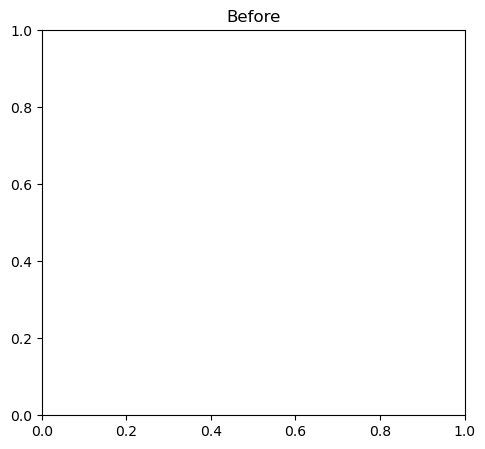

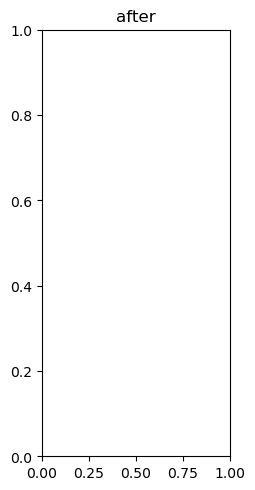

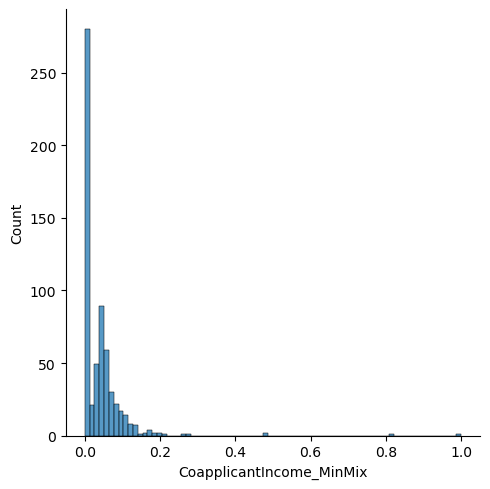

In [59]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.displot(dataset["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("after")
sns.displot(dataset["CoapplicantIncome_MinMix"])
plt.show()